
# COMPUTATIONAL INTELLIGENCE

# <font color="blue">linear regression</font>

We are going to estimate the insurance price using the linear regression method


### <font color="red">Run the modules</font>
In this lab, we use this module: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Time, for calcualte time of running of some algorithm

In [5]:
from scipy import stats
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays
import time
import pandas as pd




### <font color="red">Insert data</font>
we insert data from excel file



In [6]:
data = pd.read_excel('a.xlsx')
# Extract column 2 and 3 and 4 and 5
col1 = data.iloc[:, 1].values
col2 = data.iloc[:, 6].values
col3 = data.iloc[:, 7].values
col4 = data.iloc[:, 11].values
# Create a matrix with columns 2 and 3 and 4 and 5
X_data=[]
num=len(col4)
for i in range(num):
    X_data.append([col1[i], col2[i],col3[i]])

X_data=np.array(X_data)
y_data=np.array(col4)


## <font color="red">Our data</font>



| age (years)     | Height (cm)         | Weight (kg)      | PremiumPrice  |  
| ----------------| ------------------- |----------------- |-------------- |
| 45              | 155                 | 57               | 25000         |  
| 60              | 180                 | 83               | 29000         |  
| 36              | 158                 | 59               | 23000         | 
 ....               ....                 ...                ....

we will build a linear regression model using these values so we can then predict the price for other insurance.  



## <font color="red">Plot our data</font>

Now we intend to plot graphs of three variables based on the insurance price

X Shape: (986, 3)
y Shape: (986,)


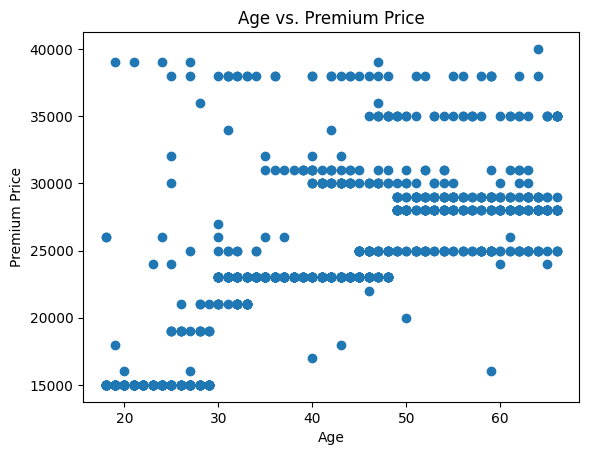

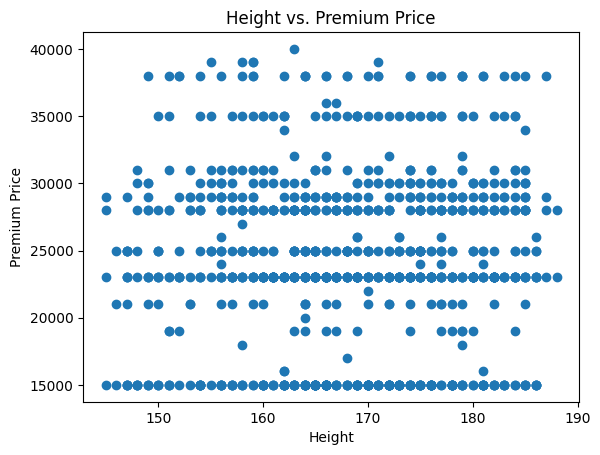

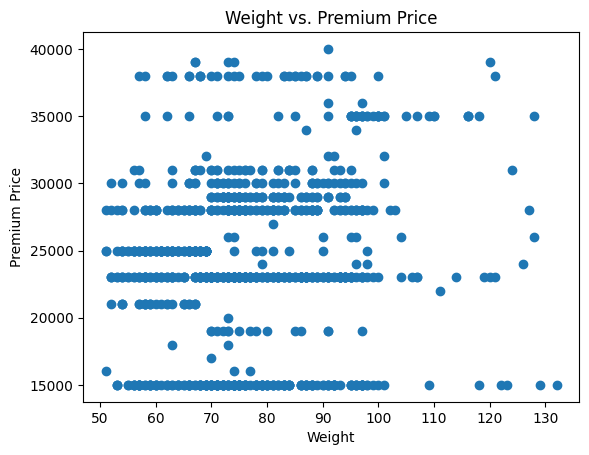

In [7]:
print("X Shape:",X_data.shape)
print("y Shape:",y_data.shape)

age = X_data[:, 0]
height = X_data[:, 1]
weight = X_data[:, 2]

# Scatter plot for Age vs. Premium Price
plt.scatter(age, y_data)
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs. Premium Price')
plt.show()

# Scatter plot for Height vs. Premium Price
plt.scatter(height, y_data)
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.title('Height vs. Premium Price')
plt.show()

# Scatter plot for Weight vs. Premium Price
plt.scatter(weight, y_data)
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.title('Weight vs. Premium Price')
plt.show()




# Scaling

## <font color="red">mean normalization </font>


Normalization is a technique used to scale data within a specific range. One way to perform normalization is by using the formula:

$$\text{Normalized}(\mathbf{x}^{(i)}) = \frac{\mathbf{x}^{(i)} - \mu}{\text{max} - \text{min}}$$

Where:
- $\text{Normalized}(\mathbf{x}^{(i)})$ represents the normalized value of the $i$-th data point.
- $\mathbf{x}^{(i)}$ is the original value of the $i$-th data point.
- $\mu$ represents the mean value of the dataset.
- $\text{max}$ and $\text{min}$ denote the maximum and minimum values of the dataset, respectively.

$$\mu = \frac{\sum_{i=1}^{N} X_i}{N}$$










48


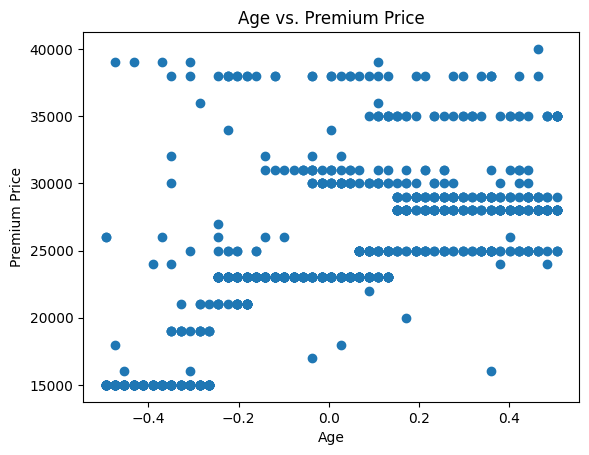

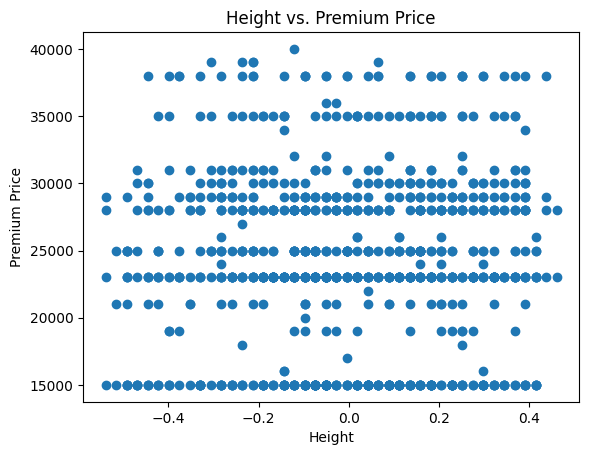

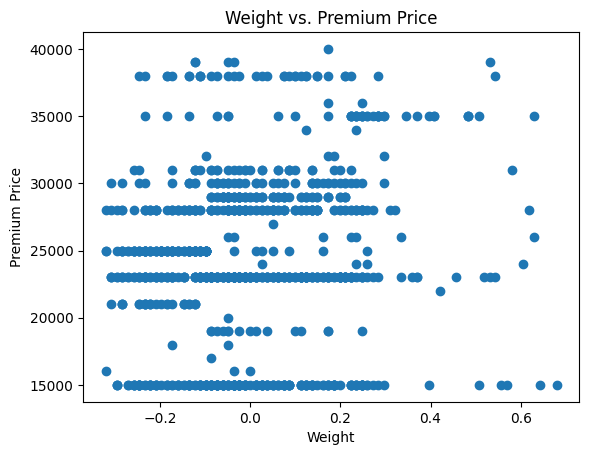

In [8]:
age = X_data[:, 0]
height = X_data[:, 1]
weight = X_data[:, 2]


mean_age = np.mean(age)
max_age = np.max(age)
min_age = np.min(age)
print(max_age - min_age)
# Normalize the data using Z-score normalization
normalized_data_age = (age - mean_age) /(max_age - min_age)

# Scatter plot for Height vs. Premium Price
plt.scatter(normalized_data_age, y_data)
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs. Premium Price')
plt.show()



mean_height = np.mean(height)
max_height = np.max(height)
min_height = np.min(height)
# Normalize the data using Z-score normalization
normalized_data_height = (height - mean_height) / (max_height - min_height)

# Scatter plot for Height vs. Premium Price
plt.scatter(normalized_data_height, y_data)
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.title('Height vs. Premium Price')
plt.show()


mean_weight = np.mean(weight)
max_weight = np.max(weight)
min_weight = np.min(weight)
# Normalize the data using Z-score normalization
normalized_data_weight = (weight - mean_weight) / (max_weight - min_weight)

# Scatter plot for Weight vs. Premium Price
plt.scatter(normalized_data_weight, y_data)
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.title('Weight vs. Premium Price')
plt.show()



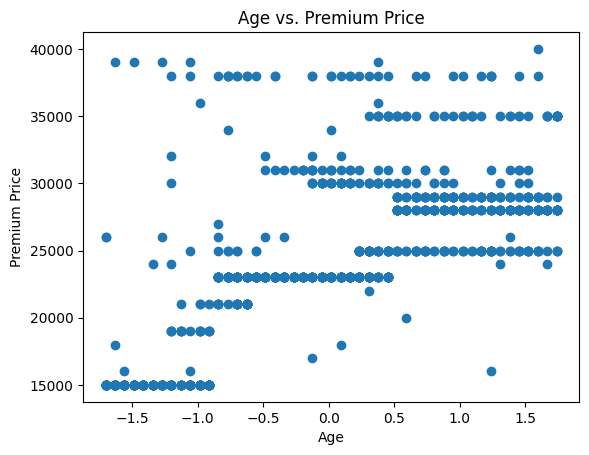

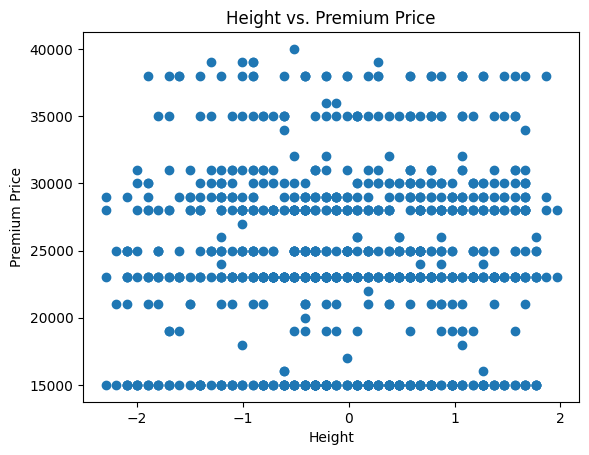

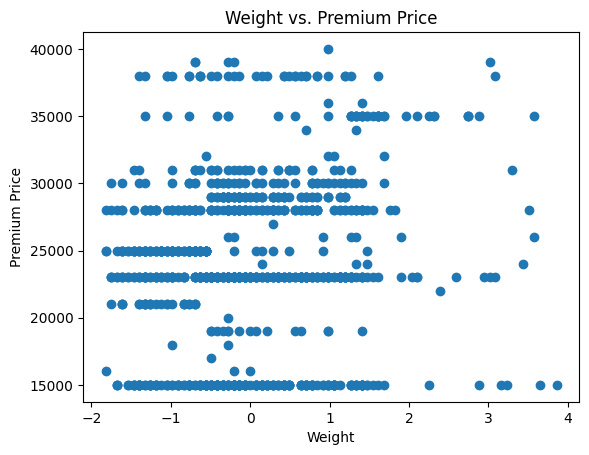

In [9]:
# Calculate mean and standard deviation
mean = np.mean(X_data, axis=0)
std = np.std(X_data, axis=0)

# Normalize the data using Z-score normalization
normalized_data = (X_data - mean) / std

age = normalized_data[:, 0]
height = normalized_data[:, 1]
weight = normalized_data[:, 2]


plt.scatter(age, y_data)
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs. Premium Price')
plt.show()

# Scatter plot for Height vs. Premium Price
plt.scatter(height, y_data)
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.title('Height vs. Premium Price')
plt.show()

# Scatter plot for Weight vs. Premium Price
plt.scatter(weight, y_data)
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.title('Weight vs. Premium Price')
plt.show()



## <font color="red"> Standardization </font>



Standardization, also known as Z-score normalization, is a technique used to transform data to have a mean of 0 and a standard deviation of 1. The formula for standardization can be expressed as:

$$\text{Standardized}(\mathbf{x}^{(i)}) = \frac{\mathbf{x}^{(i)} - \mu}{\sigma}$$

Where:
- $\text{Standardized}(\mathbf{x}^{(i)})$ represents the standardized value of the $i$-th data point.
- $\mathbf{x}^{(i)}$ is the original value of the $i$-th data point.
- $\mu$ is the mean value of the dataset.
- $\sigma$ is the standard deviation of the dataset.


$$\mu = \frac{\sum_{i=1}^{N} X_i}{N}$$
$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2}$$



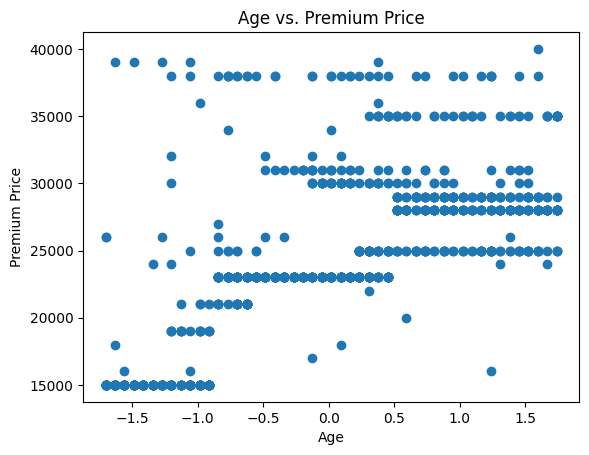

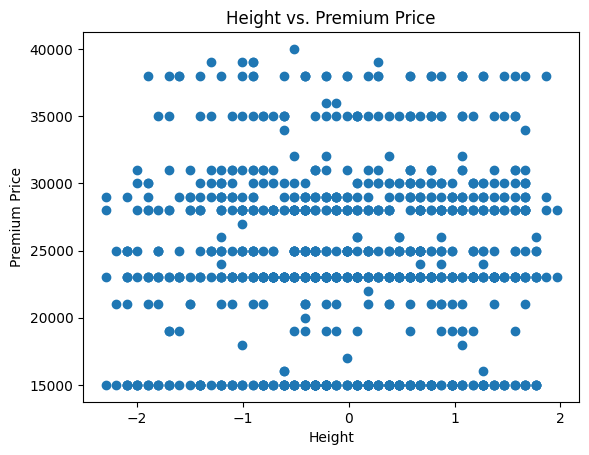

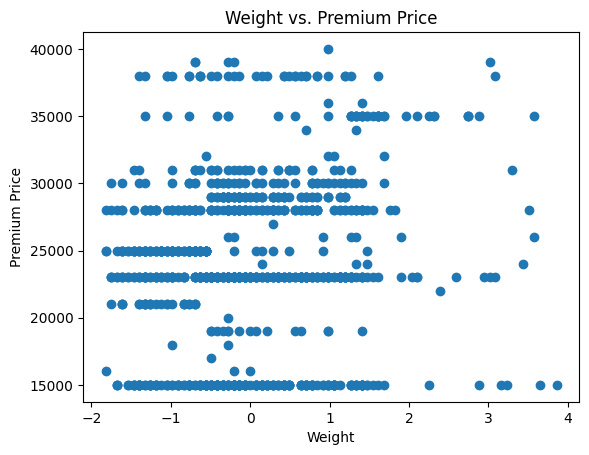

In [10]:
# Calculate mean and standard deviation
mean = np.mean(X_data, axis=0)
std = np.std(X_data, axis=0)

# Normalize the data using Z-score normalization
normalized_data = (X_data - mean) / std

age = normalized_data[:, 0]
height = normalized_data[:, 1]
weight = normalized_data[:, 2]


plt.scatter(age, y_data)
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs. Premium Price')
plt.show()

# Scatter plot for Height vs. Premium Price
plt.scatter(height, y_data)
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.title('Height vs. Premium Price')
plt.show()

# Scatter plot for Weight vs. Premium Price
plt.scatter(weight, y_data)
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.title('Weight vs. Premium Price')
plt.show()



## <font color="red"> Min-Max normalization </font>

Min-Max normalization, is a data preprocessing technique used in machine learning to scale numeric features to a specific range. The goal is to transform the data into a common scale without distorting the differences in the range of values. This process involves transforming each feature in the dataset, independently, to a specified range, usually between 0 and 1.

The formula for Min-Max Scaling is given by:

$$\text{Min-Max}(\mathbf{x}^{(i)}) = \frac{\mathbf{x}^{(i)} - \text{min}}{\text{max} - \text{min}}$$


where:
- \(X\) is the original value of the feature,
- \(X_{\text{min}}\) is the minimum value of the feature in the dataset,
- \(X_{\text{max}}\) is the maximum value of the feature in the dataset,
- \(X_{\text{new}}\) is the scaled value of the feature.

The resulting scaled values will be in the range [0, 1].


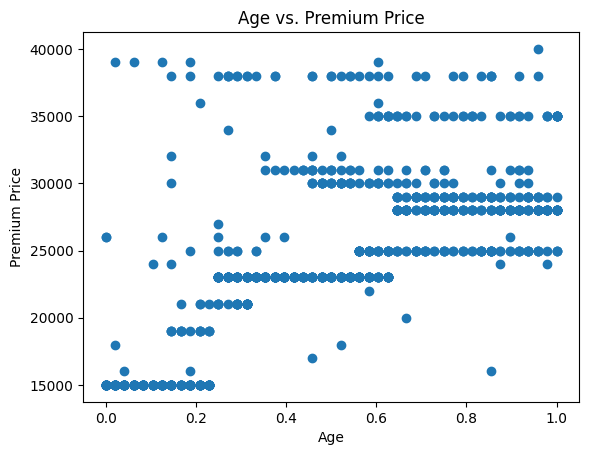

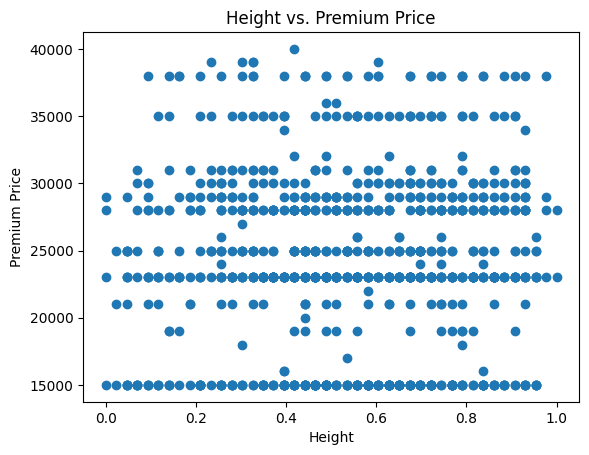

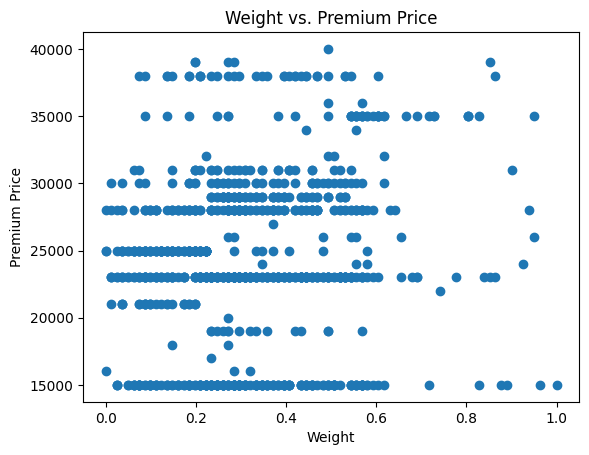

In [11]:
# Calculate minimum and maximum values
min_vals = np.min(X_data, axis=0)
max_vals = np.max(X_data, axis=0)

# Min-Max Scaling
scaled_data = (X_data - min_vals) / (max_vals - min_vals)

age = scaled_data[:, 0]
height = scaled_data[:, 1]
weight = scaled_data[:, 2]

# Scatter plot for Age vs. Premium Price
plt.scatter(age, y_data)
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs. Premium Price')
plt.show()

# Scatter plot for Height vs. Premium Price
plt.scatter(height, y_data)
plt.xlabel('Height')
plt.ylabel('Premium Price')
plt.title('Height vs. Premium Price')
plt.show()

# Scatter plot for Weight vs. Premium Price
plt.scatter(weight, y_data)
plt.xlabel('Weight')
plt.ylabel('Premium Price')
plt.title('Weight vs. Premium Price')
plt.show()


## <font color="red">Initial number</font>


Now we are going to give three initial values to W and one value to B to start the algorithm


$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
w_2 \\
w_3 \\
w_4
\end{pmatrix}
$$
$$B=b
$$

In [18]:
b_init = 0.6
w_init = np.array([200, 60, 60])
print("w_init:", w_init, "b_init :", b_init)

w_init: [200  60  60] b_init : 0.6


## <font color="red">Make Model Prediction With Multiple Variables</font>

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1+w_2x_2 + b $$
or in vectorazition:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b   $$ 
vectrozation makes our calculations faster

## <font color="red"> Single Prediction element by element</font>

We want to model's prediction with multiple variables by a for loop


In [19]:
def predict_single_loop(x, w, b): 
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

## <font color="red"> Single Prediction element by vectorization</font>

We want to model's prediction with multiple variables by vectorization


In [20]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p 

## <font color="red"> compition two methods</font>

We now run two methods for fixed data to compare the calculation time of both methods and the obtained data.

In [21]:
num = X_data.shape[0]
f_wb=[]

s_time = time.time()
for i in range(num):
    f_w = predict(X_data[i], w_init, b_init)
    f_wb.append(f_w)
e_time = time.time()
execution_time = e_time - s_time
print("Execution time for vectorization:(ms)", execution_time*1000)



start_time = time.time()
f_wbi=[]
for i in range(num):
    f_w = predict_single_loop(X_data[i], w_init, b_init)
    f_wbi.append(f_w)
end_time = time.time()
execution_time_for = end_time - start_time
print("Execution time for single_loop:(ms)", execution_time_for*1000)






x_vec = X_data[0,:]
print(" x_vec value:" ,x_vec)
f_wbx = predict_single_loop(x_vec,w_init, b_init)
print("prediction for single_loop:" , f_wbx)
f_wbz = predict(x_vec,w_init, b_init)
print("prediction for vectorization:" , f_wbz)

Execution time for vectorization:(ms) 8.881568908691406
Execution time for single_loop:(ms) 4.999876022338867
 x_vec value: [ 45 155  57]
prediction for single_loop: 21720.6
prediction for vectorization: 21720.6


## <font color="red">Compute MSE cost function for Linear Regression!</font>

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

We will Compute Cost With Multiple Variables in the next cell


$$MSE = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 


In [22]:
def compute_cost(X, y, w, b): 
    
   
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

Cost for initial w , b : 11803745.774320653


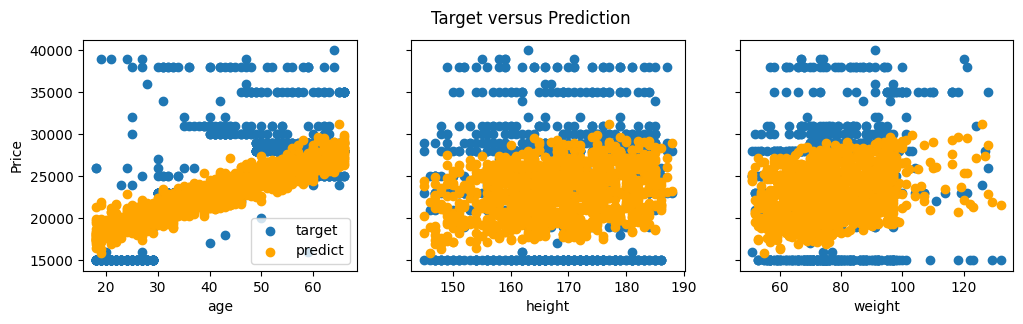

In [26]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_data, y_data, w_init, b_init)
print("Cost for initial w , b :" ,cost)


m = X_data.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_data[i], w_init) + b_init

X_features=["age","height","weight"]
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_data[:, i], y_data, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_data[:, i], yp, color='orange', label='predict')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction ")
plt.show()



## <font color="red">Compute root mean square error (RMSE) cost function for Linear Regression! </font>


The steps to calculate RMSE are as follows:

1. Calculate the squared differences between the dataset and predicted data:
   $$(y_1 - \hat{y}_1)^2, (y_2 - \hat{y}_2)^2, \ldots, (y_n - \hat{y}_n)^2$$

2. Compute the mean of the squared differences:
     $$MSE = \frac{1}{m} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
 
3. Take the square root of the MSE to obtain the RMSE:
   $$RMSE = \sqrt{MSE}$$

The RMSE value represents the average difference between the true values and predicted values, with a smaller RMSE indicating a better fit between the model predictions and the actual data.


In [27]:
def compute_rmse(X, y, w, b):
    m = X.shape[0]
    mse = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        mse = mse + (f_wb_i - y[i])**2
    mse = mse / (2 * m)
    rmse = np.sqrt(mse)
    return rmse
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_rmse(X_data, y_data, w_init, b_init)
print("Cost for initial w , b :" ,cost)



Cost for initial w , b : 3435.6579827335336



## <font color="red">Batch Gradient Descent With Multiple Variables</font>

Gradient descent for multiple variables:

$$\begin{align*} \text{iteration}&\text{ this calculate} \; \lbrace \newline\;
& w_j = w_j' -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \newline
&b\ \ = b' -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features (3 for our data set), parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$
 m is the number of training examples in the data set (986 in our data set)

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


##  Compute Gradient with Multiple Variables
An implementation for calculating the equations is below. 

In [28]:
def compute_gradient(X, y, w, b): 

    m,n = X.shape           #(number of examples 986 , number of features3)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [29]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_data, y_data, w_init, b_init)
print("dj_db at initial w,b:", tmp_dj_db)
print("dj_dw at initial w,b:", tmp_dj_dw)


dj_db at initial w,b: -1279.0551724138022
dj_dw at initial w,b: [ -75119.68 -208997.22  -98988.21]


---

# <font color="red">Stochastic Gradient Descent (SGD) With Multiple Variables</font>

Stochastic gradient descent (SGD) is an iterative optimization algorithm used to train machine learning models. The formula for updating the model parameters in SGD is as follows:

For each training example $i$:





$$
\begin{align}
w_j  &=w_j - \alpha   (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)})  \\
b &= b - \alpha   (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$







where:
- $n$ is the number of features (3 for our data set).
- $w_j$ and $b$ are the parameters (weights and bias) being updated.
- $\alpha$ is the learning rate, controlling the step size in the parameter update.
- $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction for the $i$-th training example.
- $y^{(i)}$ is the target value for the $i$-th training example.
- $x_j^{(i)}$ is the value of feature $j$ for the $i$-th training example.

In SGD, the parameters are updated iteratively for each training example, considering one example at a time. The gradients are computed based on the difference between the prediction and the true value for each example. The learning rate, $\alpha$, determines the step size for the parameter update.

Note: In practice, SGD is often performed with mini-batches, where a small randomly selected subset of examples is used instead of considering one example at a time. The formula can be adapted accordingly by averaging the gradients over the mini-batch.

---


In [30]:
def compute_gradient2(X, y, w, b):
    m, n = X.shape  # (number of examples, number of features)

    # Randomly shuffle the indices of the training examples
    indices = np.random.permutation(m)

    # Select a single example randomly for stochastic gradient descent
    random_index = indices[0]

    dj_dw = np.zeros((n,))
    dj_db = 0.

    # Compute the error for the randomly selected example
    err = (np.dot(X[random_index], w) + b) - y[random_index]

    # Update the gradients for the selected example
    for j in range(n):
        dj_dw[j] = err * X[random_index, j]
    dj_db = err

    return dj_db, dj_dw


In [31]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient2(X_data, y_data, w_init, b_init)
print("dj_db at initial w,b:", tmp_dj_db)
print("dj_dw at initial w,b:", tmp_dj_dw)

dj_db at initial w,b: -79.40000000000146
dj_dw at initial w,b: [ -2620.2 -14689.   -6907.8]


##  Gradient Descent With Multiple Variables
The routine below implements __Gradient Descent With Multiple Variables__ above.

In [32]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = [0,0,0]  
    b = 0
    

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
    
        J_history.append( cost_function(X, y, w, b))
        

        # Print cost every at intervals 10 times
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
            
            
        
    return w, b, J_history 


In the next cell we implementation __Gradient Descent With Multiple Variables__ and earn b and w

# <font color="red">divide dataset to training data and validation data</font>
Now we want to divide dataset into training data and validaton data
We consider 70% of data for training and 30% for validation

In [34]:
# Set the seed for reproducibility (optional)
np.random.seed(42)

# Shuffle the indices of X_data
indices = np.random.permutation(len(X_data))

# Calculate the split index based on the desired split percentage
split_index = int(0.7 * len(X_data))  # 70% for training, 30% for validation

# Split the data into X_train and X_valid and y_train and y_valid
X_train = X_data[indices[:split_index], :]
X_valid = X_data[indices[split_index:], :]
y_train = y_data[indices[:split_index]]
y_valid = y_data[indices[split_index:]]


# Alpha is hyperparameter Data 


In machine learning, hyperparameters are settings or configurations that are set before the learning process begins. They're not learned from the data but are instead determined prior to training. Parameters, on the other hand, are learned during the training process.

In [45]:
# initialize parameters
initial_w = [np.zeros_like(w_init)]
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-6

# run gradient descent 

w_final, b_final, J_hist  = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)



Iteration    0: Cost 221073511.83   
Iteration  100: Cost 17614181.87   
Iteration  200: Cost 16473880.79   
Iteration  300: Cost 15521398.13   
Iteration  400: Cost 14725600.50   
Iteration  500: Cost 14060547.64   
Iteration  600: Cost 13504620.98   
Iteration  700: Cost 13039799.20   
Iteration  800: Cost 12651055.99   
Iteration  900: Cost 12325859.17   


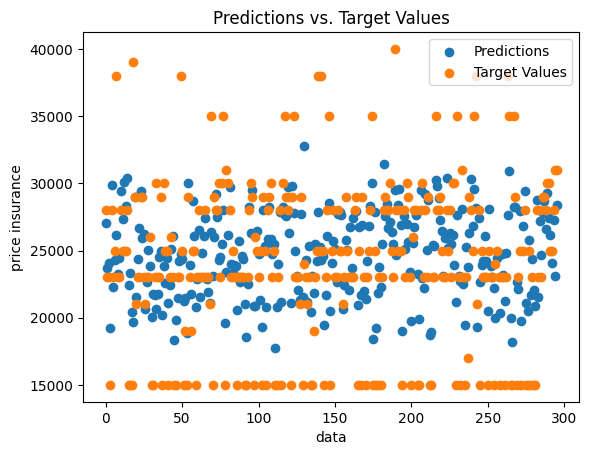

b,w found by gradient descent: 0.6578823113609829 [202.54  68.29  59.49]
MAPE: 14.41%


In [46]:
# Initialize empty lists for predictions and target values
predictions = []
targets = []
m = X_valid.shape[0]
for i in range(m):
    prediction = np.dot(X_valid[i], w_final) + b_final
    target = y_valid[i]
    predictions.append(prediction)
    targets.append(target)

# Plot the graph for predictions and target values
plt.scatter(range(m), predictions, label='Predictions')
plt.scatter(range(m), targets, label='Target Values')
plt.xlabel('data')
plt.ylabel('price insurance')
plt.title('Predictions vs. Target Values')
plt.legend()
plt.show()


print("b,w found by gradient descent:" ,b_final,w_final )

# Compute predictions
m = X_valid.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_valid[i], w_final) + b_final

# Compute accuracy using MAPE
mape = np.mean(np.abs((y_valid - yp) / y_valid)) * 100

print(f"MAPE: {mape:.2f}%")




MAPE represents the average percentage difference between the predicted and target values.

It provides a measure of the relative accuracy of the predictions compared to the target values.

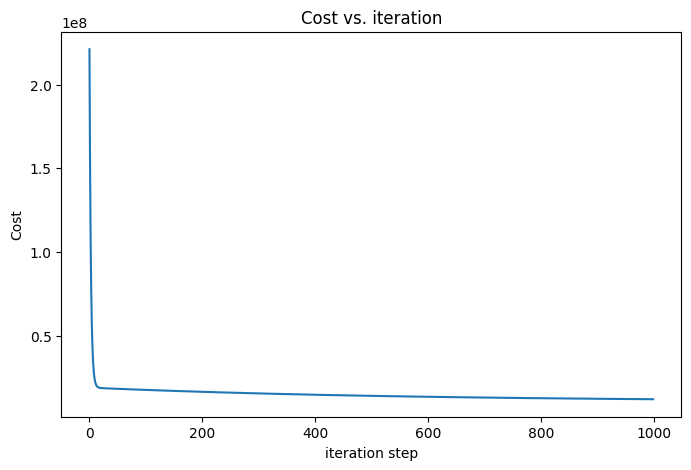

In [47]:
# plot cost versus iteration  
fig, ax1 = plt.subplots( constrained_layout=False, figsize=(8, 5))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')   

plt.show()





# Stochastc Gradient Descent With Multiple Variables 

Iteration    0: Cost 177697682.49   
Iteration  100: Cost 17700192.97   
Iteration  200: Cost 14639147.16   
Iteration  300: Cost 14981189.27   
Iteration  400: Cost 13292260.33   
Iteration  500: Cost 16019257.93   
Iteration  600: Cost 14925124.24   
Iteration  700: Cost 11860464.64   
Iteration  800: Cost 11011989.16   
Iteration  900: Cost 11947288.75   
b,w found by gradient descent: 0.6532949963826284 [235.09  62.82  57.85]
MAPE: 15.19%


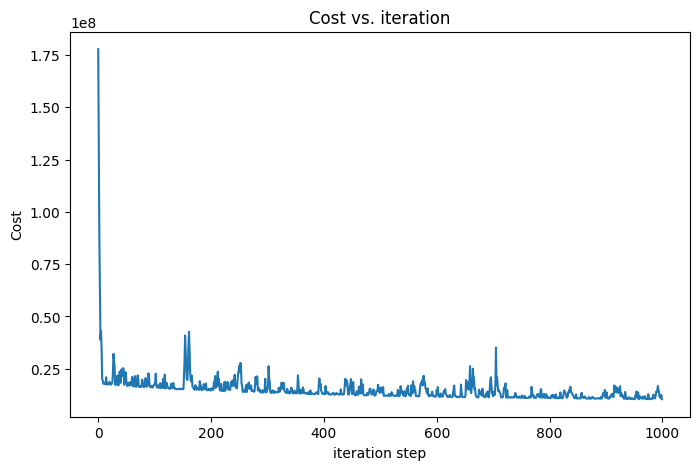

In [49]:
# initialize parameters
initial_w = [np.zeros_like(w_init)]
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 6.0e-6
# run gradient descent 

w_final, b_final, J_hist  = gradient_descent(X_data, y_data, initial_w, initial_b,
                                                    compute_cost, compute_gradient2, 
                                                    alpha, iterations)

# Initialize empty lists for predictions and target values
predictions = []
targets = []

for i in range(m):
    prediction = np.dot(X_data[i], w_final) + b_final
    target = y_data[i]
    predictions.append(prediction)
    targets.append(target)

print("b,w found by gradient descent:" ,b_final,w_final )

# Compute predictions
m = X_data.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_data[i], w_final) + b_final

# Compute accuracy using MAPE
mape = np.mean(np.abs((y_data - yp) / y_data)) * 100

print(f"MAPE: {mape:.2f}%")


# plot cost versus iteration  
fig, ax2 = plt.subplots( constrained_layout=False, figsize=(8, 5))
ax2.plot(J_hist)
ax2.set_title("Cost vs. iteration")
ax2.set_ylabel('Cost')             
ax2.set_xlabel('iteration step')   

plt.show()

# Gradient Descent With Multiple Variables and earn b and w for normalize data 

Iteration    0: Cost 312585276.66   
Iteration  100: Cost 120776434.09   
Iteration  200: Cost 50376689.01   
Iteration  300: Cost 24535131.10   
Iteration  400: Cost 15048463.50   
Iteration  500: Cost 11565422.35   
Iteration  600: Cost 10286464.22   
Iteration  700: Cost 9816775.58   
Iteration  800: Cost 9644261.96   
Iteration  900: Cost 9580889.55   


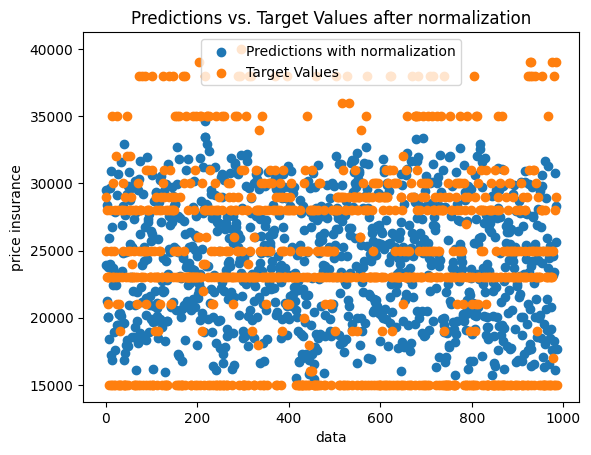

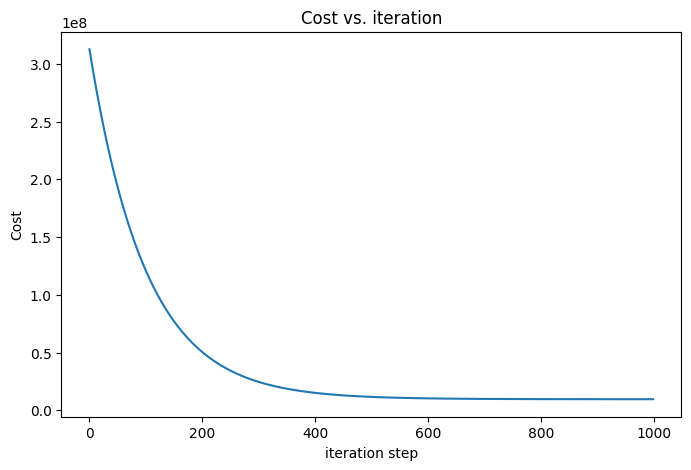

b,w found by gradient descent: 0.6532949963826284 [235.09  62.82  57.85]
MAPE: 12.83%


In [50]:
# initialize parameters
initial_w = [np.zeros_like(w_init)]
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-3
# run gradient descent 

w_final_n, b_final_n, J_hist_n  = gradient_descent(normalized_data, y_data, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

# Initialize empty lists for predictions and target values
predictions_n = []
targets_n = []

for i in range(m):
    prediction = np.dot(normalized_data[i], w_final_n) + b_final_n
    target = y_data[i]
    predictions_n.append(prediction)
    targets_n.append(target)

# Plot the graph for predictions and target values
plt.scatter(range(m), predictions_n, label='Predictions with normalization')
plt.scatter(range(m), targets_n, label='Target Values')
plt.xlabel('data')
plt.ylabel('price insurance')
plt.title('Predictions vs. Target Values after normalization')
plt.legend()
plt.show()


# plot cost versus iteration  
fig, ax1 = plt.subplots( constrained_layout=False, figsize=(8, 5))
ax1.plot(J_hist_n)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')   
plt.show()

print("b,w found by gradient descent:" ,b_final,w_final )

# Compute predictions
m = X_data.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(normalized_data[i], w_final_n) + b_final_n

# Compute accuracy using MAPE
mape = np.mean(np.abs((y_data - yp) / y_data)) * 100

print(f"MAPE: {mape:.2f}%")





# use sklearn module to predict insurance cost

Now we are going to perform these calculations using the ready-made sklearn module to find out how correct our work was.

In [66]:
#!pip install sklearn

MAPE: 13.01%


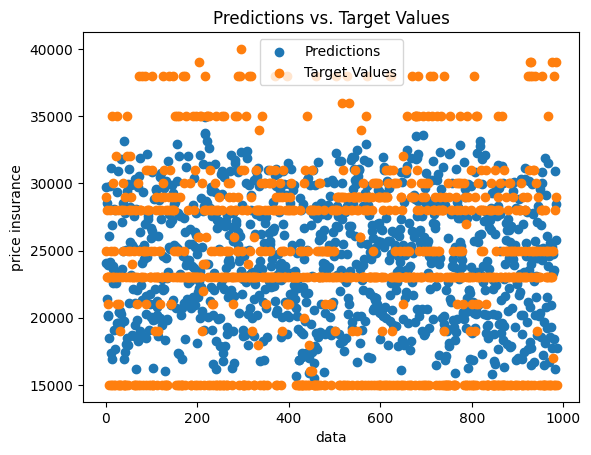

In [51]:

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_data, y_data)

# Make predictions on the same data
y_pred = model.predict(X_data)


# Compute accuracy using MAPE
mape = np.mean(np.abs((y_data - y_pred ) / y_data)) * 100

print(f"MAPE: {mape:.2f}%")

# Initialize empty lists for predictions and target values

# Plot the graph for predictions and target values
plt.scatter(range(m),  y_pred, label='Predictions')
plt.scatter(range(m), y_data, label='Target Values')
plt.xlabel('data')
plt.ylabel('price insurance')
plt.title('Predictions vs. Target Values')
plt.legend()
plt.show()
